### La classification par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Breast Cancer Wisconsin (Diagnostic) Dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

MLPClassifier(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
pd.set_option('display.max_columns', None)

In [13]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [14]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [17]:
# Standardisation des données - jeu de train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scld = sc.fit_transform(X_train)
X_train_scld
# on peut faire un graph avec boxplots pour chaque caractéristique avant/après feature scaling

array([[ 0.26670379,  0.64119581,  0.21021862, ...,  0.57195757,
        -0.36743271, -0.29487344],
       [-1.50538429, -0.78076949, -1.4608281 , ..., -0.14909852,
         0.04677597,  1.00205472],
       [ 1.50388483,  2.19180417,  1.67631803, ...,  1.18936185,
        -0.13144928,  0.93430053],
       ...,
       [-0.30323355,  0.01865526, -0.38082036, ..., -1.55951427,
        -0.75688789, -1.18922878],
       [-0.07525861, -0.69347598, -0.14238757, ..., -0.89178629,
        -0.88395589, -0.72398332],
       [-0.63963558, -0.12147379, -0.56963008, ...,  0.59599277,
         3.07495497,  3.17583505]])

In [18]:
# Recherche des meilleurs hyperparamètres avec GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# hidden_layer_sizes: hidden_layer_sizes=(50,) = une couche cachée de 50 neurones; hidden_layer_sizes=(100, 50, 25) = trois couches cachées de tailles 100, 50 et 25
# options de combinaisons pour hidden_layer_size
nbre_couches = [1, 2]  # Nombre de couches
nbre_neurones = [20, 25, 30, 35, 40]  # Nombre de neurones dans chaque couche

hidden_layer_size_combi = []
for n_couche in nbre_couches:
    for n_neurone in nbre_neurones:
        hidden_layer_size_combi.append(tuple([n_neurone] * n_couche)) # Génération des combinaisons de tailles de couches cachées
# Ajout des permutations de tailles de neurones dans chaque couche
import itertools
for n_couche in nbre_couches:
    for permutation in itertools.permutations(nbre_neurones, n_couche):
        hidden_layer_size_combi.append(permutation)
print(hidden_layer_size_combi)

param_grid = {'hidden_layer_sizes':hidden_layer_size_combi,
                    'activation': ['identity', 'logistic', 'tanh', 'relu']}

# Créez un modèle MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

# Créez une instance GridSearchCV pour rechercher les meilleurs hyperparamètres
# en cherchant à minimiser l'entropie croisée
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', cv=3, n_jobs=-1) #possibilité de refit=True, return_train_score=True

# Effectuez la recherche sur les hyperparamètres
grid_search.fit(X_train_scld, y_train)

# Obtenez les meilleurs hyperparamètres
best_params = grid_search.best_params_

# Affichez les résultats
print("Meilleurs hyperparamètres:", best_params)
# pd.DataFrame(gridSearchCV.cv_results_)

[(20,), (25,), (30,), (35,), (40,), (20, 20), (25, 25), (30, 30), (35, 35), (40, 40), (20,), (25,), (30,), (35,), (40,), (20, 25), (20, 30), (20, 35), (20, 40), (25, 20), (25, 30), (25, 35), (25, 40), (30, 20), (30, 25), (30, 35), (30, 40), (35, 20), (35, 25), (35, 30), (35, 40), (40, 20), (40, 25), (40, 30), (40, 35)]
Meilleurs hyperparamètres: {'activation': 'tanh', 'hidden_layer_sizes': (20, 25)}


In [19]:
# Entrainement du modèle MLPClassifier avec les meilleurs hyperparamètres
model_final = MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)
model_final.fit(X_train_scld, y_train)

MLPClassifier(hidden_layer_sizes=(40,), max_iter=10000, random_state=0,
              solver='lbfgs')

In [20]:
# Prédictions - jeu de train
ypred_train = model_final.predict(X_train_scld)

In [21]:
# Performances - jeu de train
# Accuracy
from sklearn.metrics import accuracy_score, log_loss
acc_train = accuracy_score(y_train, ypred_train)
print("Accuracy:", acc_train)
# Calcul de l'erreur: cross entropy: Log-loss : La log-loss est une métrique qui mesure la performance du modèle en termes de probabilités prédites par rapport aux valeurs réelles.
entropy_train = log_loss(y_train, ypred_train)
print("Entropie croisée :", entropy_train)

Accuracy: 1.0
Entropie croisée : 2.220446049250313e-16


In [ ]:
# Matrice de confusion sur le jeu de train

In [22]:
# Standardisation des données - jeu de test
X_test_scld = sc.transform(X_test)

In [23]:
# Prédictions - jeu de test
ypred_test = model_final.predict(X_test_scld)

In [24]:
# Performances - jeu de test
# Accuracy
acc_test = accuracy_score(y_test, ypred_test)
print("Accuracy:", acc_test)
# Calcul de la cross entropy: Log-loss : La log-loss est une métrique qui mesure la performance du modèle en termes de probabilités prédites par rapport aux valeurs réelles.
entropy_test = log_loss(y_test, ypred_test)
print("Entropie croisée :", entropy_test)

Accuracy: 0.9649122807017544
Entropie croisée : 1.2646895926006019


In [25]:
# Précision (TP/(TP+FP))
from sklearn.metrics import precision_score
precision = precision_score(y_test, ypred_test)
precision

0.9722222222222222

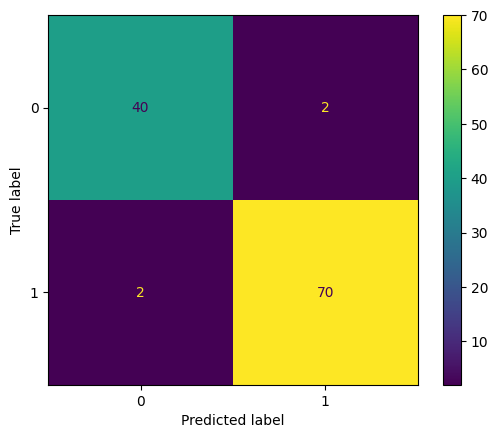

In [26]:
# Matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ypred_test, y_test)

In [28]:
# Proposition CNAM:
mlp = MLPClassifier(hidden_layer_sizes=50, alpha=1e-5, max_iter=1000, solver='adam', random_state=0)
mlp.fit(X_train, y_train)
print(f"Accuracy du MLP: {mlp.score(X_test, y_test)*100:.1f}%")

# Comme nous l’avons vu, l”accuracy est une métrique biaisée en faveur de la classe la plus représentée. 
# À la place, nous pouvons calculer la précision et le rappel pour chaque classe. Dans notre cas, 
# c’est notamment la précision et le rappel sur la classe 0 (tumeur maligne) qui nous intéresse : 
# cela nous permettra d’évaluer combien de fausses alarmes ont été produites et combien de tumeur malignes ont été « ratées ».

# scikit-learn propose une fonction bien utile permettant de résumer ces métriques de classification :

from sklearn.metrics import classification_report

print("\t========= Métriques pour le MLP ============")
print(classification_report(y_test, mlp.predict(X_test)))

Accuracy du MLP: 93.0%
	========= Métriques pour le MLP ============
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

